# Data Structure Overview

## The `my_spectra` Array

The `my_spectra` array contains all the spectra loaded from the file.

### Array Structure
Each element in the array follows this format:
```
[mzs, intensities, coordinates]
```

### Component Descriptions

- **`mzs`**: An array of recorded m/z values for that pixel
- **`intensities`**: An array of recorded intensities corresponding to the m/z values for that pixel  
- **`coordinates`**: A tuple in the form `(x, y, z)` where `z=1` for all pixels

### Key Points
- Each spectrum corresponds to a specific spatial location
- The x,y coordinates allow mapping spectra to their physical positions

In [2]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('Cancer.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])

print(f"Total spectra loaded: {len(my_spectra)}")

    

Total spectra loaded: 160000


In [6]:
import numpy as np
import random

# To show that different pixels have different number of recorded mz values
for spectrum in my_spectra[0::10000]:
    print(f'Pixel {spectrum[2][:2]} has recorded mzs',len(spectrum[0]))

Pixel (0, 1) has recorded mzs 43
Pixel (0, 26) has recorded mzs 327
Pixel (0, 51) has recorded mzs 381
Pixel (0, 76) has recorded mzs 487
Pixel (0, 101) has recorded mzs 225
Pixel (0, 126) has recorded mzs 145
Pixel (0, 151) has recorded mzs 279
Pixel (0, 176) has recorded mzs 421
Pixel (0, 201) has recorded mzs 729
Pixel (0, 226) has recorded mzs 491
Pixel (0, 251) has recorded mzs 380
Pixel (0, 276) has recorded mzs 646
Pixel (0, 301) has recorded mzs 1389
Pixel (0, 326) has recorded mzs 148
Pixel (0, 351) has recorded mzs 199
Pixel (0, 376) has recorded mzs 930


**1. The above cell show that there are only 2 relevant coordinates (x,y) since z=1 for each spectrum**

**From this we can conclude that each spectrum can be plotted on a cartesian plane**

**2. We can see that we always have the same number of intensities as m/z ratios**

**With this array, we can plot the 2D graph of intensities vs m/z for a single pixel point**



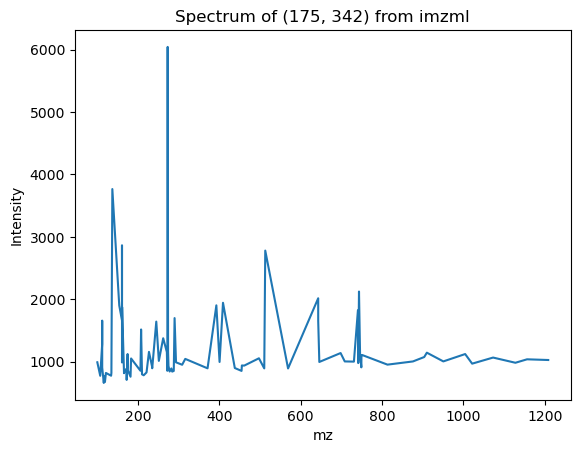

[100.11268 107.24074 112.0512  112.08746 112.11249]
[ 989.26953  772.83594 1282.0469  1657.0781   904.16797]


In [4]:
import matplotlib.pyplot as plt

spectrumx = my_spectra[random.randint(0,len(my_spectra)-1)]
# spectrumx = my_spectra[2]
plt.plot(spectrumx[0],spectrumx[1])
title = "Spectrum of " + str(spectrumx[2][:2]) + " from imzml"
plt.title(title)
plt.xlabel("mz")
plt.ylabel("Intensity")
plt.show()

print(spectrumx[0][:5])
print(spectrumx[1][:5])


Points found 19388


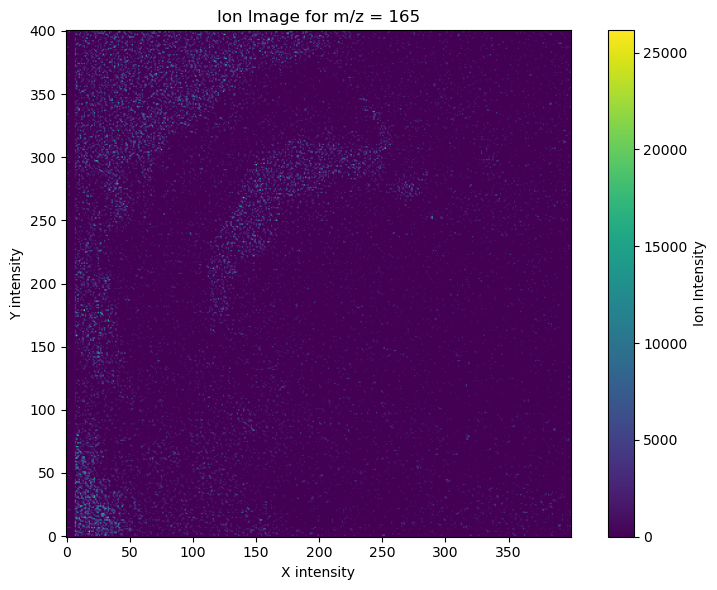

In [5]:

# Choose the m/z you want to plot  and tolerance
target_mz = 165
tolerance = 0.02

# Get image dimensions
all_coords = [coord for _, _, coord in my_spectra]
xs, ys, _ = zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in my_spectra:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()